<a href="https://colab.research.google.com/github/alessaag/Exploraci-n-y-Visualizaci-n-de-Datos/blob/main/PracticaAnalisisDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Análisis de datos del Titanic**



# Preparación del entorno e importación de bibliotecas

Se analiza el dataset del Titanic de: https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset Titanic
data = pd.read_csv('/content/train.csv')

Se observan las primeras filas del dataset y se analizan sus generalidades

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.shape

(891, 12)

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Gráfico de barras para supervivencia por clase

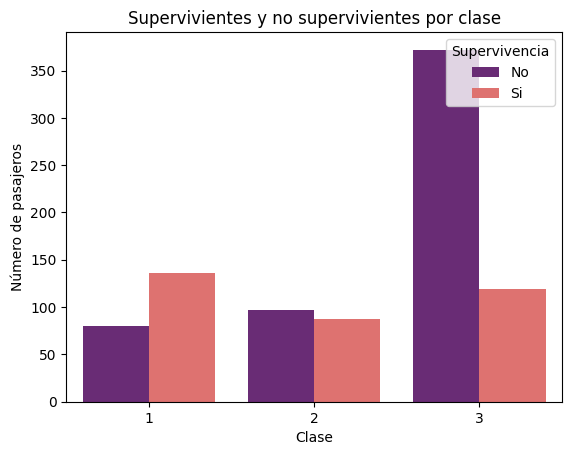

In [2]:
#Gráfico de barras con solores personalizados
sns.countplot(data, x='Pclass', hue='Survived', palette='magma') #Otros posibles palette son 'viridis' y 'Set2'
plt.title('Supervivientes y no supervivientes por clase')
plt.xlabel('Clase')
plt.ylabel('Número de pasajeros')
plt.legend(title='Supervivencia', loc='upper right', labels=["No","Si"])
plt.show()

Tasa de supervivencia por clase

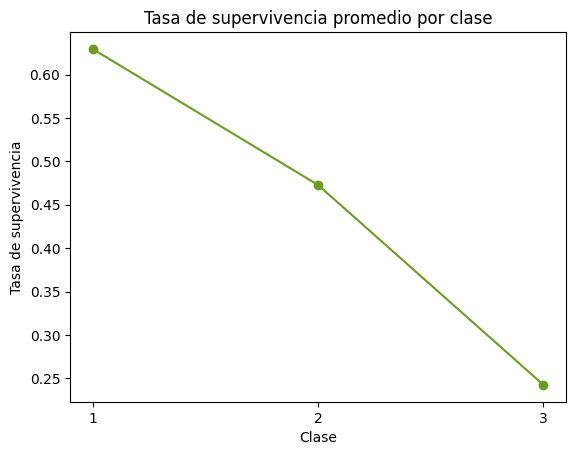

In [5]:
survival_rate = data.groupby('Pclass')['Survived'].mean()
survival_rate.plot(kind='line', marker='o', color='#6A9E1F')#el color se puede seleccionar de este sitio web: https://htmlcolorcodes.com/es/
plt.title('Tasa de supervivencia promedio por clase')
plt.xlabel('Clase')
plt.ylabel('Tasa de supervivencia')
plt.xticks([1, 2, 3])
plt.show()

Análisis de supervivencia por edad y sexo

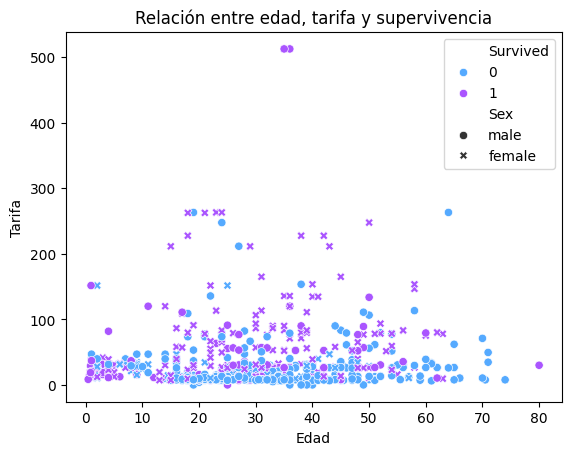

In [16]:
sns.scatterplot(data, x='Age', y='Fare', hue='Survived', style='Sex', palette='cool')
plt.title('Relación entre edad, tarifa y supervivencia')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()


Mapa de calor de supervivencia

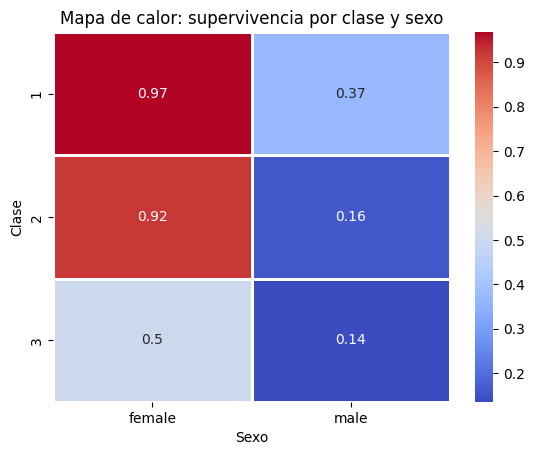

In [20]:
pivot_table = data.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidth=1)
plt.title('Mapa de calor: supervivencia por clase y sexo')
plt.xlabel('Sexo')
plt.ylabel('Clase')
plt.show()